## **Iris Dataset Machine Learning Classification**

**Importing Modules**

In [61]:
# data analysis
import pandas as pd

# data visualization
import matplotlib.pyplot as plt
import seaborn as sns

**Fetching the Data**

In [62]:
iris = pd.read_csv('iris.csv')
iris.drop('Id', axis=1, inplace=True)
iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


**Quick Look at The Data Structure**

In [63]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


**Categorical Data**

In [64]:
iris['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

- There are 150 observations with 4 features each (SepalLengthCm, SepalWidthCm, PetalLengthCm, PetalWidthCm).
- There are no null values, so we don't have to worry about that.
- There are 50 observations of each species (setosa, versicolor, virginica)

**Numerical Data**

In [65]:
iris.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


**Visualization**

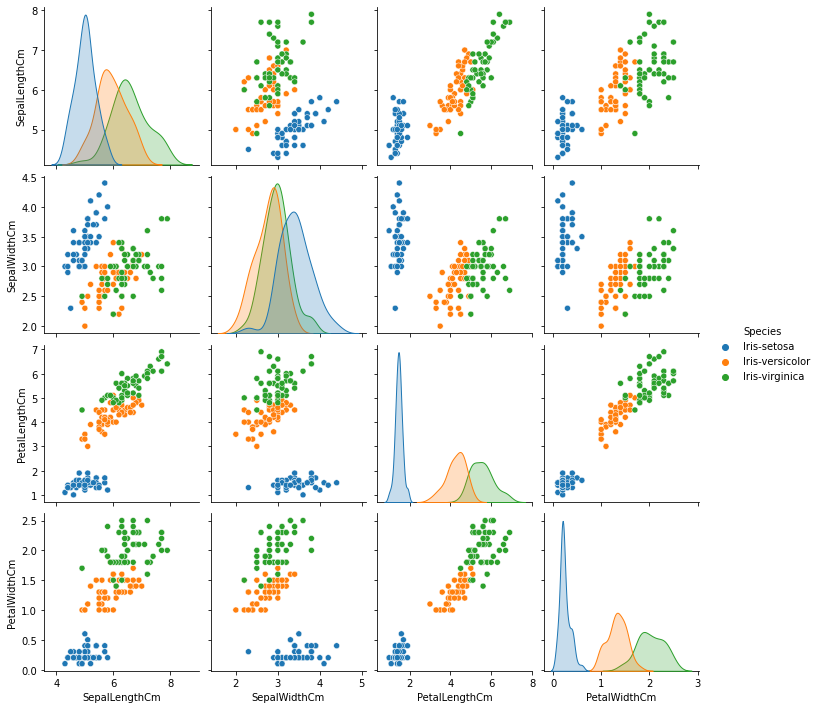

In [66]:
sns.pairplot(iris, hue='Species')
plt.show()

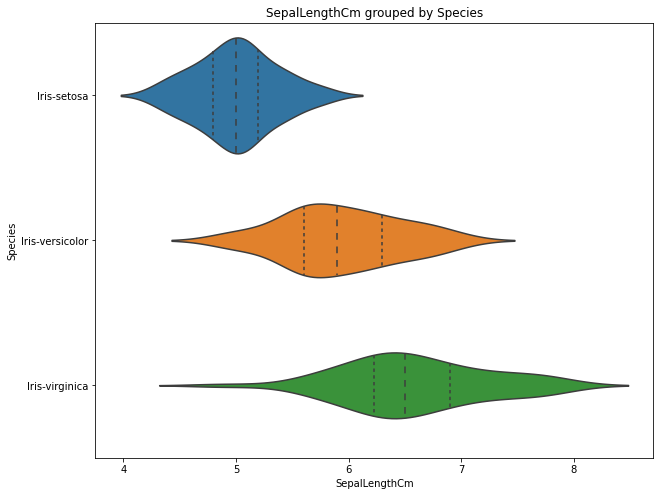

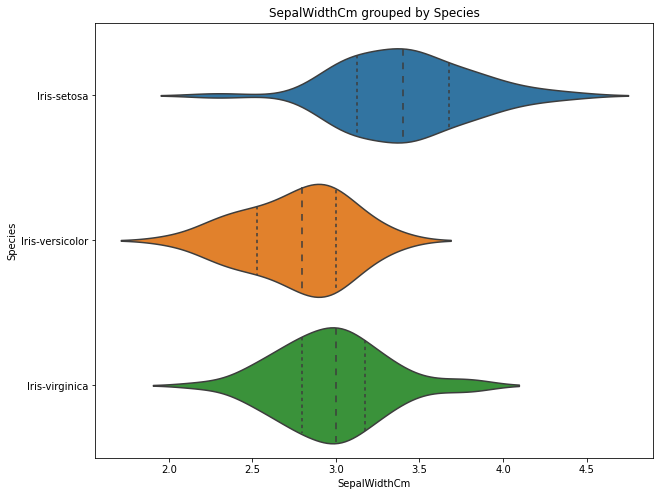

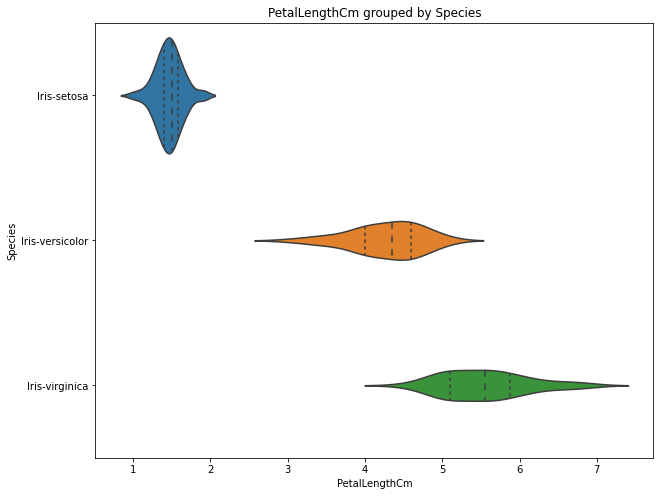

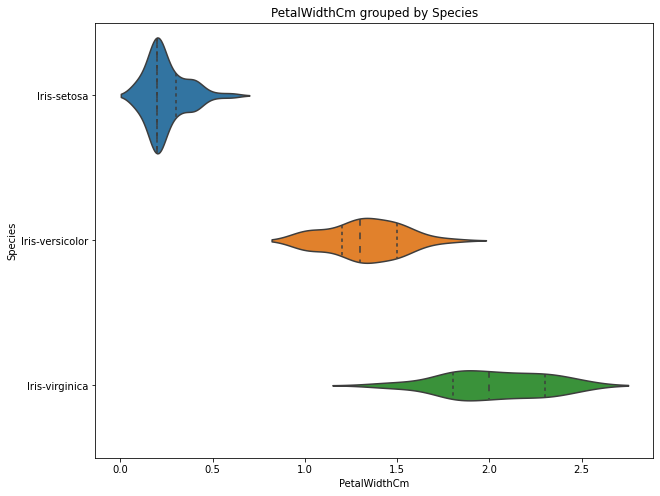

In [67]:
attr = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']

for i in attr:
    plt.figure(figsize=(10,8))
    sns.violinplot(y='Species', x=i, data=iris, inner='quartile')
    plt.title('{} grouped by Species'.format(i))
    plt.show()

**Creating Training and Test Sets**

Stratified sampling based on the `Species` column.

In [68]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=1/2, random_state=42)

for train_ix, test_ix in split.split(iris, iris['Species']):
    train_set = iris.loc[train_ix]
    test_set = iris.loc[test_ix]

sets_summary = f"""
Train set lenght: {len(train_set)}
Test set length: {len(test_set)}
"""
print(sets_summary)


Train set lenght: 75
Test set length: 75



**Separating the Data and the Labels**

In [69]:
X_train, y_train, X_test, y_test = train_set.drop('Species', axis=1), train_set['Species'], test_set.drop('Species', axis=1), test_set['Species']

print('Train set:')
print('X_train shape:', X_train.shape)
print('y_train shape:', y_train.shape)
print('\nTest set:')
print('X_test shape:', X_test.shape)
print('y_test shape:', y_test.shape)

Train set:
X_train shape: (75, 4)
y_train shape: (75,)

Test set:
X_test shape: (75, 4)
y_test shape: (75,)


### **Preprocessing the Data**

However there are no missing values in the dataset they can occur in the datasets added in the future to the model,  
so it's a good practice to use the `SimpleImputer` in the pipeline anyway.  
Machine Learning algorithms deal better with scaled values, so I'm using `StandardScaler` to do it,  
other commonly used scaler is `MinMaxScaler`, which is a bit more affected by outliers.

In [70]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')), # filling in the missing values with the median
    ('scaler', StandardScaler()) # standarizing the values
])

Creating the full preprocessing pipeline.

In [71]:
from sklearn.compose import ColumnTransformer

num_attribs = list(X_train.columns)

preprocessing_pipeline = ColumnTransformer([
    ('num', num_pipeline, num_attribs)
])

Now we have a preprocessing pipeline that takes the raw data and outputs numerical input features can be  
fed to the Machine Learning model.

Updating the training dataset:

In [72]:
X_train = preprocessing_pipeline.fit_transform(X_train)

### **Multiclass Classification**

**Support Vector Machine Classifier (SVC)**

In [73]:
from sklearn.svm import SVC

svm_clf = SVC()
svm_clf.fit(X_train, y_train)

from sklearn.model_selection import cross_val_score
svm_scores = cross_val_score(svm_clf, X_train, y_train, cv=10, scoring='accuracy')
svm_scores.mean()

0.9607142857142857

**SGD Classifier (Stochastic Gradient Descent)**

In [74]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=49)
sgd_clf.fit(X_train, y_train)

sgd_scores = cross_val_score(sgd_clf, X_train, y_train, cv=10, scoring='accuracy')
sgd_scores.mean()

0.8964285714285716

**Random Forest Classifier**

In [75]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier()
forest_clf.fit(X_train, y_train)

forest_scores = cross_val_score(forest_clf, X_train, y_train, cv=10, scoring='accuracy')
forest_scores.mean()

0.9446428571428571

**KNeighbors Classifier**

In [76]:
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_train)

knn_scores = cross_val_score(knn_clf, X_train, y_train, cv=10, scoring='accuracy')
knn_scores.mean()

0.9607142857142857

### **Classifiers Scores Summary**

In [77]:
classifiers = ['SVM', 'SGD', 'Forest', 'KNeighbors']
scores = [round(svm_scores.mean(), 2), 
            round(sgd_scores.mean(), 2),
            round(forest_scores.mean(), 2),
            round(knn_scores.mean(), 2)]

res = pd.DataFrame(zip(classifiers, scores), columns=['classifiers', 'scores'])
res.set_index('classifiers', inplace=True)
res

,scores
classifiers,
SVM,0.96
SGD,0.90
Forest,0.94
KNeighbors,0.96


Instead of just looking at the mean accuracy across the 10 cross-validation folds, let's plot all 10 scores for each model,  
along with a box plot highlighting the lower and upper quartiles, and "whiskers" showing the extent of the scores.

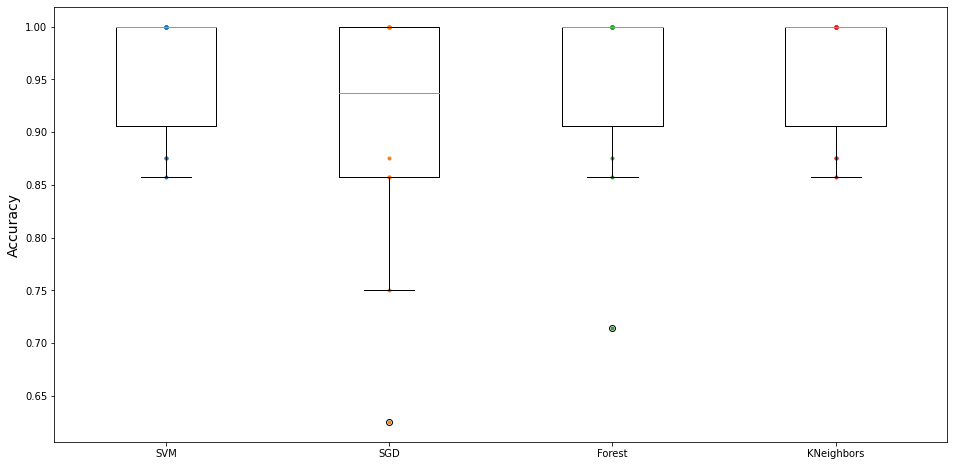

In [78]:
plt.figure(figsize=(16, 8))
plt.plot([1]*10, svm_scores, ".")
plt.plot([2]*10, sgd_scores, ".")
plt.plot([3]*10, forest_scores, ".")
plt.plot([4]*10, knn_scores, ".")
plt.boxplot([svm_scores, sgd_scores, forest_scores, knn_scores], labels=classifiers)
plt.ylabel("Accuracy", fontsize=14)
plt.show()

What's interesting SVM and KNeighbors classifiers performed almost equally good.  
SGD and Random Forest classifiers performed not bad either, however not as good as the two mentioned above.  

I'll procced with the KNeighbors classifier.

### **Hyperparameter Tuning**

In [79]:
from sklearn.model_selection import GridSearchCV

param_grid = [{
    'n_neighbors': list(range(1, 30)), # number of neighbors that are closest to the new  data
    'p': [1, 2] # distance of the new data (1 - Manhattan distance, 2 - Euclidean distance)
}]

grid_search = GridSearchCV(knn_clf, param_grid, cv=5, scoring='accuracy')

grid_search.fit(X_train, y_train)

final_model = grid_search.best_estimator_
final_model

KNeighborsClassifier(n_neighbors=8)

In [80]:
final_scores = cross_val_score(final_model, X_train, y_train, cv=5)
round(final_scores.mean(), 2)

0.99

Model's cross value score (with 10 folds) on the training set is equal to 99%.

### **Testing the Model on the Test Data**

**Making Predictions**

In [81]:
predictions = final_model.predict(preprocessing_pipeline.transform(X_test))
predictions[:9]

array(['Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor'], dtype=object)

**Model's accuracy**

In [82]:
from sklearn.metrics import accuracy_score
accuracy_perc = round((accuracy_score(y_test, predictions))*100, 2)
print('Accuracy of the model is equal to {}%.'.format(accuracy_perc))


Accuracy of the model is equal to 94.67%.
